# Movie recommendations
In the following project the given csv files are read and combined into a single DataFrame for analysing and processing

In [23]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Section 1
In this section the csv files are read , merged into 1 DataFrame and the columns are assigned specified value names.

In [24]:
# assign variables to each file
links = pd.read_csv("C:\\Users\\heyle\\Downloads\\links.csv")
movies = pd.read_csv("C:\\Users\\heyle\\Downloads\\movies.csv")
ratings = pd.read_csv("C:\\Users\\heyle\\Downloads\\ratings.csv")
tags = pd.read_csv("C:\\Users\\heyle\\Downloads\\tags.csv")

In [25]:
# converging tables into 1
links_movies = pd.merge(links, movies, on="movieId")
links_movies_ratings = pd.merge(links_movies, ratings, on="movieId")
links_movies_ratings_tags = pd.merge(links_movies_ratings, tags, on="movieId")

### Merged DataFrame

In [26]:
# display the merged dataframe
links_movies_ratings_tags

,movieId,imdbId,tmdbId,title,genres,userId_x,rating,timestamp_x,userId_y,tag,timestamp_y
0,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,336,pixar,1139045764
1,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,474,pixar,1137206825
2,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,567,fun,1525286013
3,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,336,pixar,1139045764
4,1,114709,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,474,pixar,1137206825
...,...,...,...,...,...,...,...,...,...,...,...
233208,187595,3778644,348350.0,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,586,5.0,1529899556,62,star wars,1528934552
233209,193565,1636780,71172.0,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,anime,1537098582
233210,193565,1636780,71172.0,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,comedy,1537098587
233211,193565,1636780,71172.0,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,3.5,1537098554,184,gintama,1537098603


The columns are renamed and the required columns are seperated from the merged DataFrame

In [27]:
df1 = pd.DataFrame(data = links_movies_ratings_tags)
# rename columns
df1.rename(columns = {"userId_x":"user_id", "movieId":"item_id", "timestamp_x":"timestamp"}, inplace = True)
# create a new table with required features
df2 = df1[["user_id", "item_id", "rating", "timestamp", "imdbId"]]
# drop migrated features from old data
df1.drop(["user_id", "item_id", "rating", "timestamp", "imdbId"], axis=1, inplace=True)
# print the dataframe of features not being used
df1

,tmdbId,title,genres,userId_y,tag,timestamp_y
0,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764
1,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825
2,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,1525286013
3,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764
4,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825
...,...,...,...,...,...,...
233208,348350.0,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,62,star wars,1528934552
233209,71172.0,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,anime,1537098582
233210,71172.0,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,comedy,1537098587
233211,71172.0,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,184,gintama,1537098603


## Section 2
In this question the DataFrame is cleanded and exported in csv format.

In [28]:
# check for null values in columns
df2.isnull().sum()

user_id      0
item_id      0
rating       0
timestamp    0
imdbId       0
dtype: int64

In [29]:
# drop all rows with a rating value less than 3 stars
df2 = df2.drop(index=df2[df2["rating"]<3].index)

In [30]:
# check there are no ratings below 3 stars
starList = []
for line in df2["rating"]:
    if line < 3:
        starList.append(line)
print(starList)

[]


Display the cleanded DataFrame

In [31]:
# the dataframe that is to be used for model training
df2

,user_id,item_id,rating,timestamp,imdbId
0,1,1,4.0,964982703,114709
1,1,1,4.0,964982703,114709
2,1,1,4.0,964982703,114709
3,5,1,4.0,847434962,114709
4,5,1,4.0,847434962,114709
...,...,...,...,...,...
233208,586,187595,5.0,1529899556,3778644
233209,184,193565,3.5,1537098554,1636780
233210,184,193565,3.5,1537098554,1636780
233211,184,193565,3.5,1537098554,1636780


A correlation matrix is used below to show the correlation value between the features.

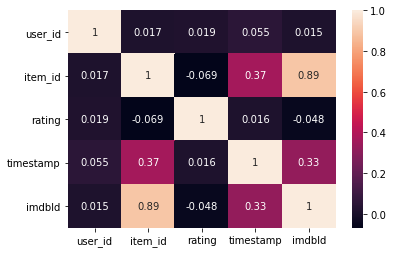

In [32]:
# create correlation matrix
corr = df2.corr()
sns.heatmap(corr, annot=True)

A distplot function is used below to show the univariate distribution of observations in the item_id data.

In [33]:
# seperate the target feature from the data for analysis
target = df2.item_id
# rows 0 to 10 000 are used because these are included in model training later on
target = target.loc[0:10000]

Skewness: 0.4631500131470778
Kurtosis: -1.1508986601273226


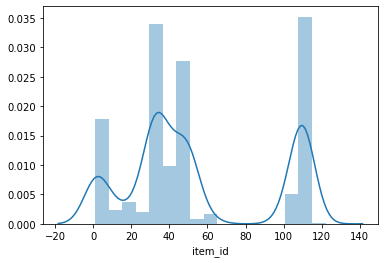

In [34]:
# create distribution plot
sns.distplot(target)
print("Skewness:", target.skew())
print("Kurtosis:", target.kurtosis())

It can be observed that the target data is positively skewed. The curtosis value is negative indicating that most of the data points are situated close to the mean.

#### Export the DataFrame in csv format

In [35]:
# export the data without index values
df2.to_csv("C:\\Users\\heyle\\Downloads\\MLPQ1.csv", index=False)